# Customer Churn Prediction

## 1. Loading libraries and dataset. 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from tensorflow import keras
from sklearn.linear_model import LogisticRegression

In [5]:
df=pd.read_csv('Customer_Churn_Dataset.csv')

## 2. Understanding the data.

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.shape

(7043, 21)

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## 3. Data manipulation 

#### Dropping customerID since it has no use 

In [11]:
df=df.drop(['customerID'],axis=1)

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Converting TotalCharges to int

In [13]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Check for null values 

In [14]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Checking those null values of TotalCharges

In [15]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### Checking if any other tenure has zeroes in it

In [16]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

#### Creating new dataset without null values

In [17]:
df1=df[df['tenure']!=0]

In [38]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 4. Data Visualization

### Gender Distribution

Text(0.5, 1.0, 'Gender Distribution')

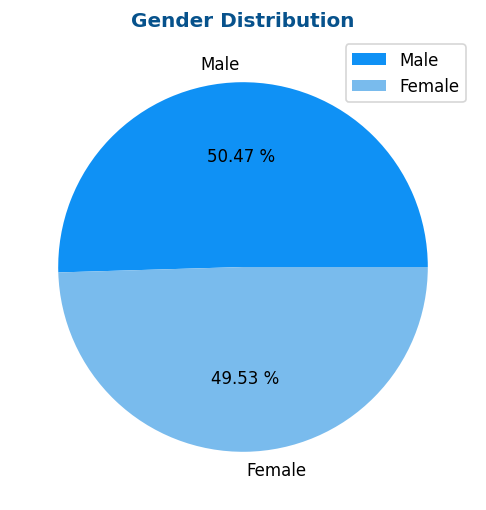

In [88]:
male=df1.loc[df1['gender']=='Male'].count()[0]

female=df1.loc[df1['gender']=='Female'].count()[0]

gcolors=['#0f91f5','#79bbed']

glabels=['Male','Female']

plt.figure(figsize=(8,5),dpi=120)

plt.pie([male,female],labels=glabels,colors=gcolors,autopct='%.2f %%')

plt.legend()

plt.title('Gender Distribution',fontdict={'fontweight':'bold','color':'#07528c'})

### Churn Distribution 

Text(0.5, 1.0, 'Churn Distribution')

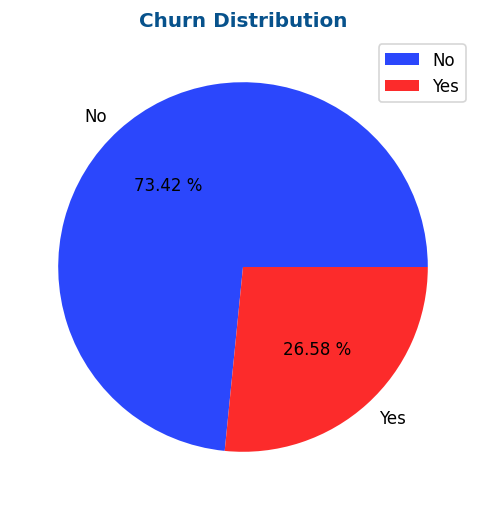

In [109]:
yes=df1.loc[df1['Churn']=='Yes'].count()[0]

no=df1.loc[df1['Churn']=='No'].count()[0]

ccolors=['#2b47fc','#fc2b2b']

clabels=['No','Yes']

plt.figure(figsize=(8,5),dpi=120)

plt.pie([no,yes],labels=clabels,colors=ccolors,autopct='%.2f %%')

plt.legend()

plt.title('Churn Distribution',fontdict={'fontweight':'bold','color':'#07528c'})

### Customer contract distribution

Text(0.5, 1.0, 'Customer Contract Distribution')

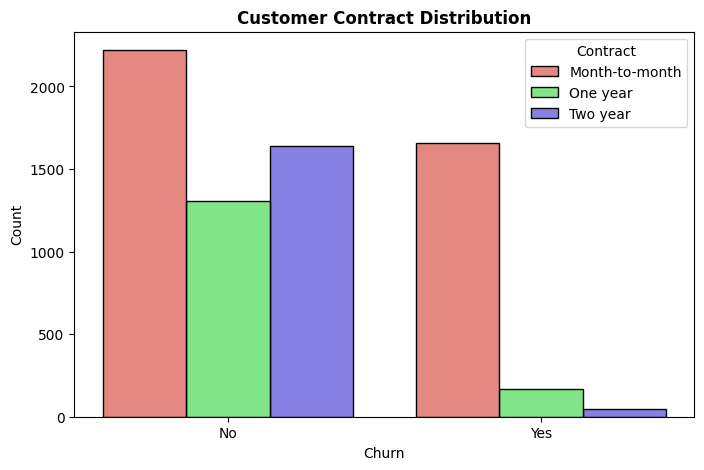

In [118]:
plt.figure(figsize=(8,5),dpi=100)

sns.histplot(x = df1['Churn'], hue = df1['Contract'],multiple = "dodge",shrink=0.8,palette='hls')

plt.title('Customer Contract Distribution',fontdict={'fontweight':'bold'})

### Payment method distribution

Text(0.5, 1.0, 'Payment Method Distribution')

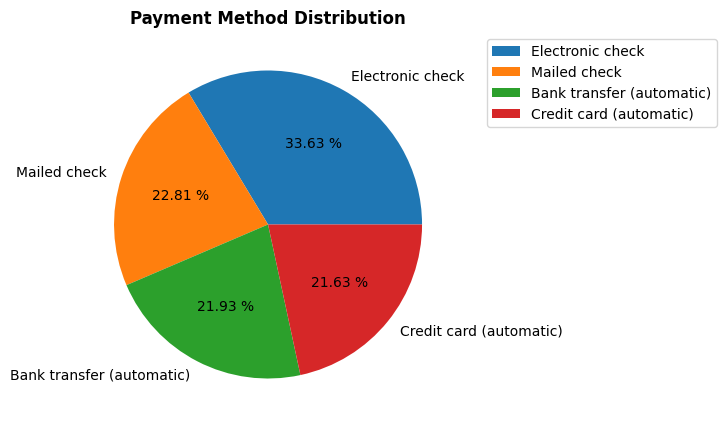

In [129]:
pvalues=df1['PaymentMethod'].value_counts()

plabels = df1['PaymentMethod'].unique()

plt.figure(figsize=(8,5),dpi=100)

plt.pie(pvalues,labels=plabels,autopct='%.2f %%')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.title('Payment Method Distribution',fontdict={'fontweight':'bold'})

### Churn w.r.t Payment method 

Text(0.5, 1.0, 'Churn vs Payment Method')

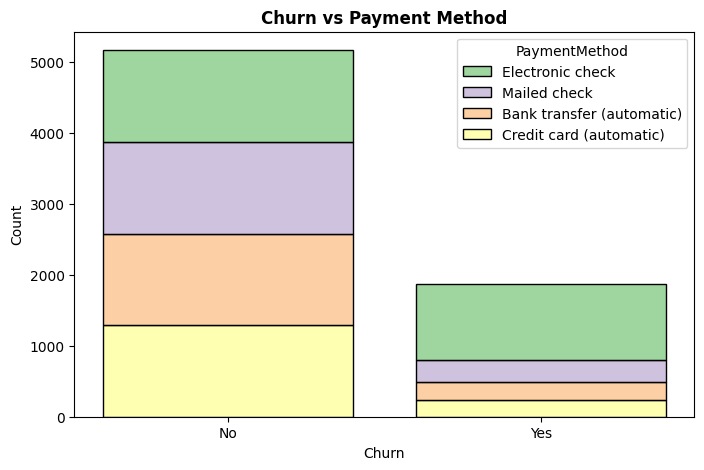

In [161]:
plt.figure(figsize=(8,5),dpi=100)

sns.histplot(x = df1['Churn'], hue = df1['PaymentMethod'],multiple = "stack",shrink=0.8,palette='Accent')

plt.title('Churn vs Payment Method',fontdict={'fontweight':'bold'})

### Churn w.r.t Internet Service

Text(0.5, 1.0, 'Churn vs Internet Service')

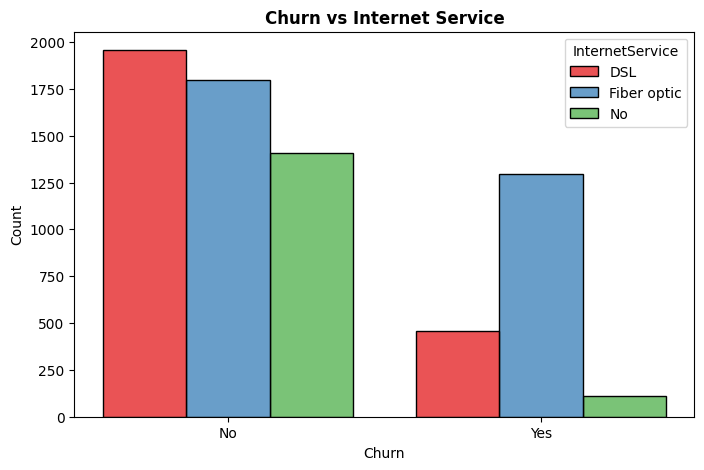

In [160]:
plt.figure(figsize=(8,5),dpi=100)

sns.histplot(x = df1['Churn'], hue = df1['InternetService'],multiple = "dodge",shrink=0.8,palette='Set1')

plt.title('Churn vs Internet Service',fontdict={'fontweight':'bold'})

### Dependents distribution 

Text(0.5, 1.0, 'Dependents Distribution')

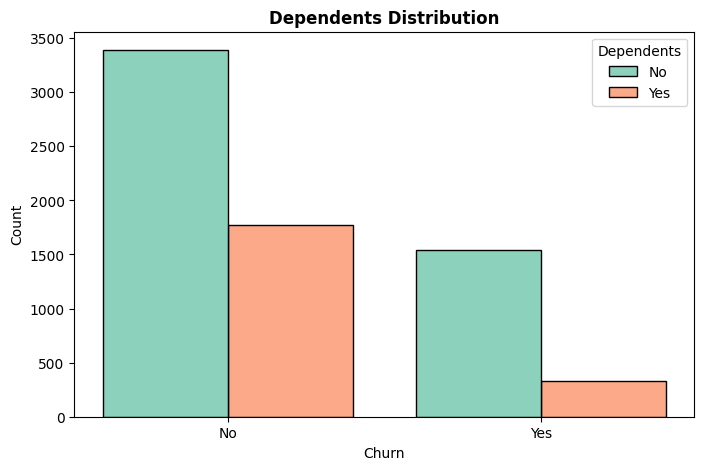

In [140]:
plt.figure(figsize=(8,5),dpi=100)

sns.histplot(x = df1['Churn'], hue = df1['Dependents'],multiple = "dodge",shrink=0.8,palette='Set2')

plt.title('Dependents Distribution',fontdict={'fontweight':'bold'})

### Churn w.r.t Partners 

Text(0.5, 1.0, 'Churn vs Partner')

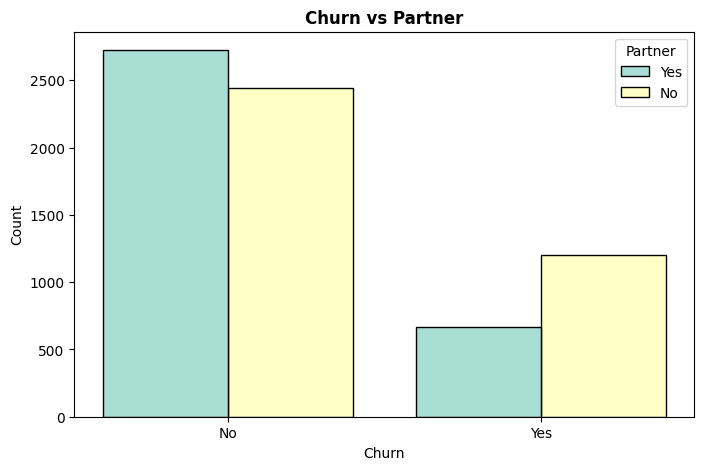

In [145]:
plt.figure(figsize=(8,5),dpi=100)

sns.histplot(x = df1['Churn'], hue = df1['Partner'],multiple = "dodge",shrink=0.8,palette='Set3')

plt.title('Churn vs Partner',fontdict={'fontweight':'bold'})

### Churn w.r.t Senior Citizens 

Text(0.5, 1.0, 'Churn vs Senior Citizen')

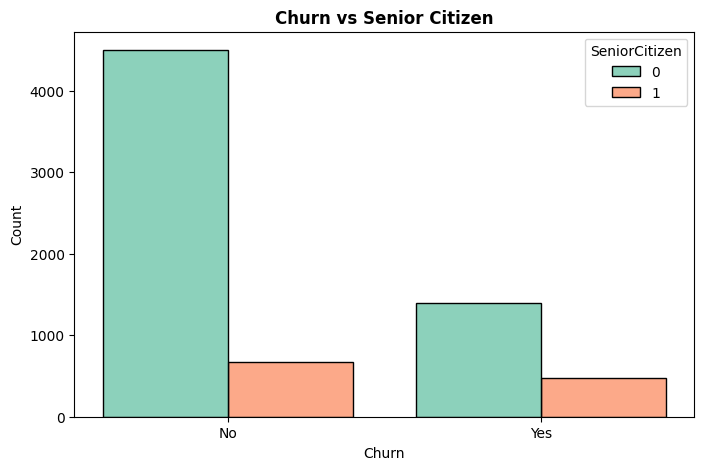

In [146]:
plt.figure(figsize=(8,5),dpi=100)

sns.histplot(x = df1['Churn'], hue = df1['SeniorCitizen'],multiple = "dodge",shrink=0.8,palette='Set2')

plt.title('Churn vs Senior Citizen',fontdict={'fontweight':'bold'})

### Churn w.r.t Online Security 

Text(0.5, 1.0, 'Churn vs Online Security')

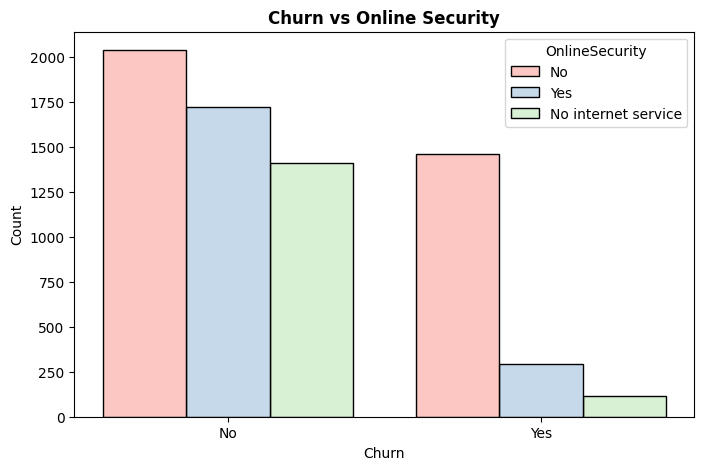

In [149]:
plt.figure(figsize=(8,5),dpi=100)

sns.histplot(x = df1['Churn'], hue = df1['OnlineSecurity'],multiple = "dodge",shrink=0.8,palette='Pastel1')

plt.title('Churn vs Online Security',fontdict={'fontweight':'bold'})

### Churn w.r.t Paperless Billing 

Text(0.5, 1.0, 'Churn vs Paperless Billing')

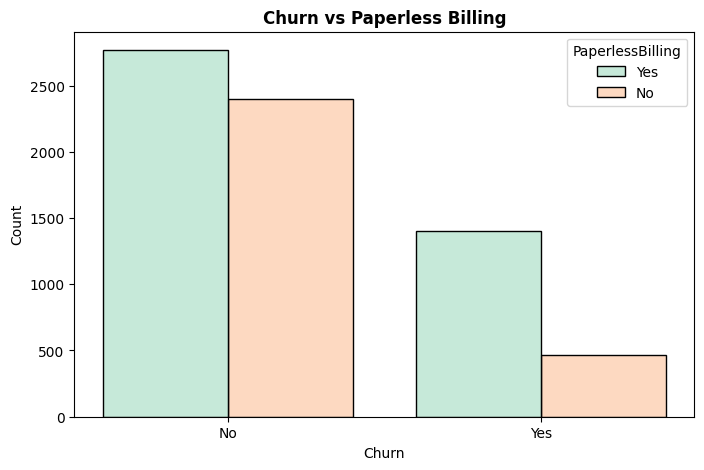

In [152]:
plt.figure(figsize=(8,5),dpi=100)

sns.histplot(x = df1['Churn'], hue = df1['PaperlessBilling'],multiple = "dodge",shrink=0.8,palette='Pastel2')

plt.title('Churn vs Paperless Billing',fontdict={'fontweight':'bold'})

### Churn w.r.t Tech Support 

Text(0.5, 1.0, 'Churn vs Tech Support')

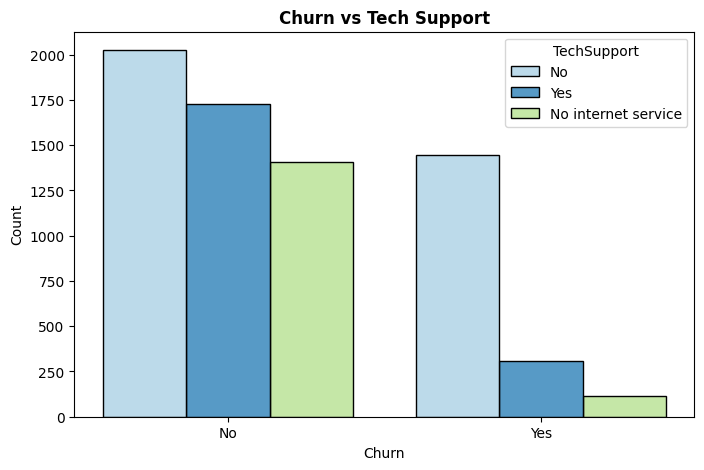

In [155]:
plt.figure(figsize=(8,5),dpi=100)

sns.histplot(x = df1['Churn'], hue = df1['TechSupport'],multiple = "dodge",shrink=0.8,palette='Paired')

plt.title('Churn vs Tech Support',fontdict={'fontweight':'bold'})

### Churn w.r.t Phone Service 

Text(0.5, 1.0, 'Churn vs Phone Service')

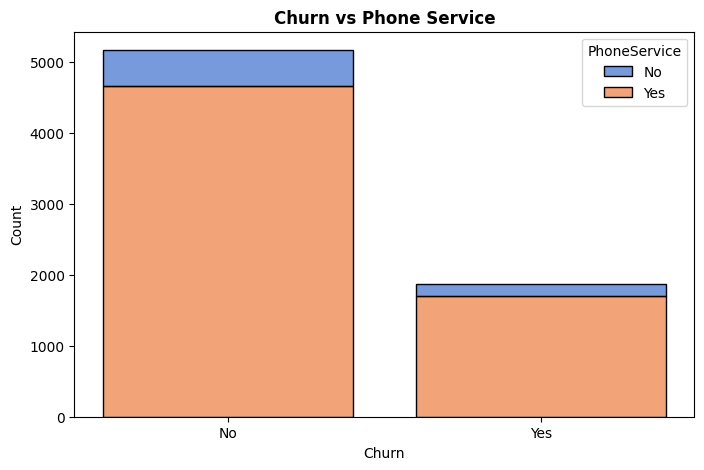

In [159]:
plt.figure(figsize=(8,5),dpi=100)

sns.histplot(x = df1['Churn'], hue = df1['PhoneService'],multiple = "stack",shrink=0.8,palette='muted')

plt.title('Churn vs Phone Service',fontdict={'fontweight':'bold'})

### Churn w.r.t Tenure

Text(0.5, 1.0, 'Churn vs Tenure')

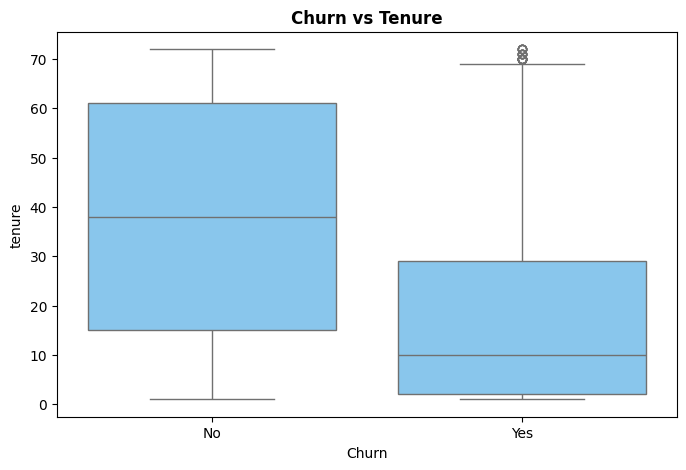

In [170]:
plt.figure(figsize=(8,5),dpi=100)

sns.boxplot(x=df1['Churn'], y=df1['tenure'],color='#79cafc')

plt.title('Churn vs Tenure',fontdict={'fontweight':'bold'})

## Data Preprocessing 

### Converting values to 0s and 1s

In [21]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [22]:
df1 = df1.apply(lambda x: object_to_int(x))

df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Splitting the dataset 

In [36]:
X = df1.drop(columns = ['Churn'])

y = df1['Churn'].values

In [28]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [37]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [40]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5710,0,0,1,0,70,1,2,1,0,2,2,2,2,2,2,1,2,110.50,7752.05
2513,1,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.20,1054.75
1078,0,1,0,0,59,1,2,1,0,2,0,0,0,0,2,1,1,79.20,4590.35
5711,0,1,1,0,20,1,2,1,0,0,2,0,2,0,0,0,2,90.80,1951.00
6574,0,1,0,0,9,1,2,1,0,0,2,0,2,0,0,1,2,90.10,816.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,0,0,0,0,71,1,2,1,2,2,2,2,2,2,2,1,2,118.65,8477.60
1290,1,1,1,0,72,1,2,0,2,2,2,0,2,2,2,0,1,84.45,5899.85
2095,1,0,0,0,1,1,0,1,0,0,0,0,2,0,0,1,2,79.95,79.95
2139,0,0,0,0,7,1,0,0,0,0,0,0,2,2,0,1,2,66.85,458.10


### Scaling numeric columns  

In [44]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

df_std = pd.DataFrame(StandardScaler().fit_transform(df1[num_cols].astype('float64')), columns=num_cols)

In [45]:
df_std[num_cols]

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


### Label and hot encoding 

In [46]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] 

cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe))

In [48]:
cat_cols_le

['StreamingTV',
 'DeviceProtection',
 'SeniorCitizen',
 'StreamingMovies',
 'gender',
 'Dependents',
 'TechSupport',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines',
 'OnlineBackup',
 'Partner',
 'OnlineSecurity']

In [49]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])

## Machine Learning Models and Predictions

### KNN

In [53]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 

knn_model.fit(X_train,y_train)

predicted_y = knn_model.predict(X_test)

accuracy_knn = knn_model.score(X_test,y_test)

print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.776303317535545


In [56]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



### Gaussian Model 

In [63]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy_Gaussian=nb_model.score(X_test,y_test)

print("Gaussian accuracy:",accuracy_Gaussian)

Gaussian accuracy: 0.7639810426540284


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1549
           1       0.54      0.77      0.63       561

    accuracy                           0.76      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.80      0.76      0.77      2110



### ANN

In [99]:
model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100,verbose=0)

In [100]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 706us/step - loss: 0.4371 - accuracy: 0.7929


[0.4370574653148651, 0.7928909659385681]

In [101]:
y_pred=model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

66/66 [==============================] - 0s 587us/step


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1549
           1       0.62      0.56      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110



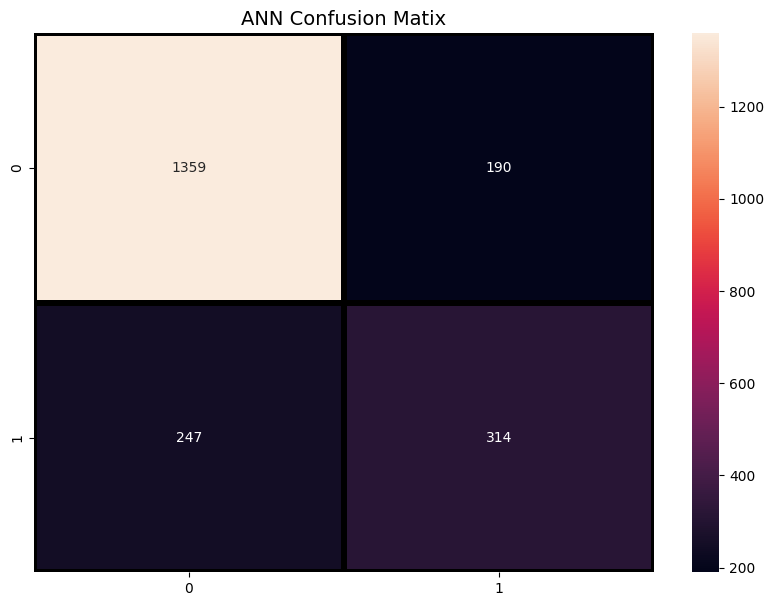

In [108]:
ANN_cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))

sns.heatmap(ANN_cm,annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("ANN Confusion Matix",fontsize=14)

plt.show()

### Logistic Regression

In [109]:
lr_model = LogisticRegression()

lr_model.fit(X_train,y_train)

accuracy_lr = lr_model.score(X_test,y_test)

print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [110]:
lr_pred= lr_model.predict(X_test)

report = classification_report(y_test,lr_pred)

print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



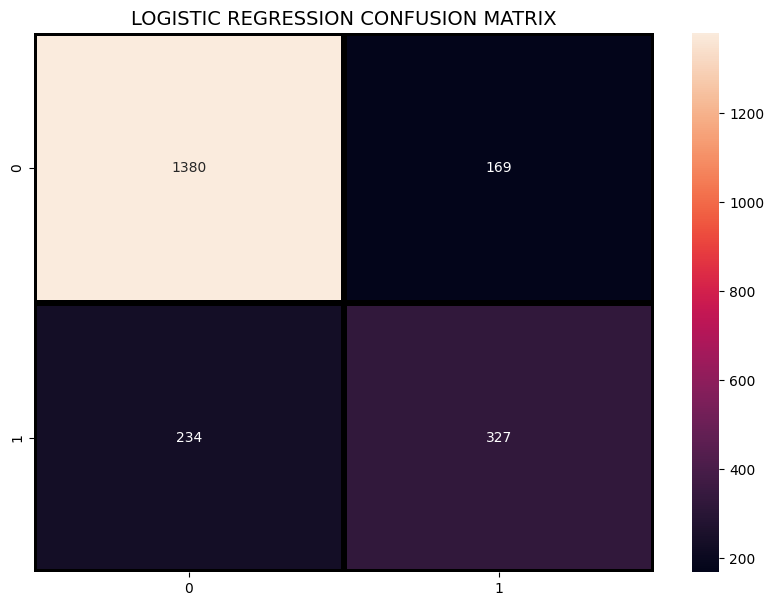

In [112]:
LR_cm=confusion_matrix(y_test,lr_pred)

plt.figure(figsize=(10,7))

sns.heatmap(LR_cm, annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)

plt.show()